In [1]:
%pylab
%matplotlib inline
import numpy as np

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
dt = 0.6
w0 = 0.057
w1 = 0.114
Up0 = 0.58 + 3.17 * 0.08 **2 /(4 * w0**2)
Up0  

2.1410957217605415

In [88]:
data = loadtxt('./HHG_0.dat' )
time, Ex, Ey, Ax, Ay, Dx, Dy, intA1x, intA1y = data [:, 0], data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7], data[:, 8]

In [75]:
data1 = loadtxt('../HHG_LBY/sfa-mono/data.dat')
time1, Ex1, Ax1, intA1, D_real, D_imag = data1[:,0], data1[:,1], data1[:,2], data1[:,3], data1[:,4], data1[:,5]

$ phi = w(t-tc+duration/2) \\
A = A_0sin^2(\dfrac{phi}{2nc})sin(phi) \\
E = -A_0(\dfrac{w}{nc}sin(\dfrac{phi}{2nc})cos(\dfrac{phi}{2nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
E = -A_0(\dfrac{w}{2nc}2sin(\dfrac{phi}{2nc})cos(\dfrac{phi}{2nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
E = -A_0(\dfrac{w}{2nc}sin(\dfrac{phi}{nc})sin(phi)+w\times sin^2(\dfrac{phi}{2nc})cos(phi))  \\
$

[10.0236 10.167  10.293  10.4015 10.4923] [ 9.998496 10.14158  10.26729  10.37551  10.4661  ]


(12000, 14900)

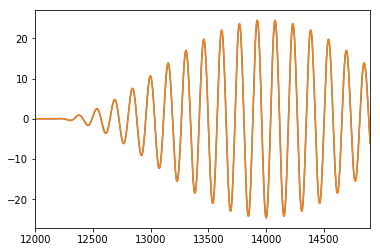

In [100]:
plot(intA1y)
plot(intA1)
print(intA1[14995:15000],intA1y[14995:15000])
# title('$E_x \quad & \quad E_y$')
# plot(Ex,Ey)/
# plot(Ax,Ay)
xlim(12000,14900)

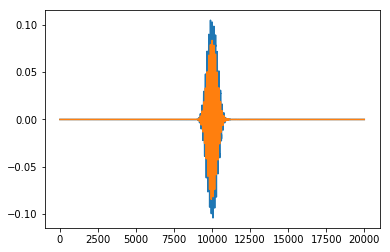

In [80]:
plot(time, Dy)
plot(time, D_real)
# xlim(-500,500)

(-600, 50)

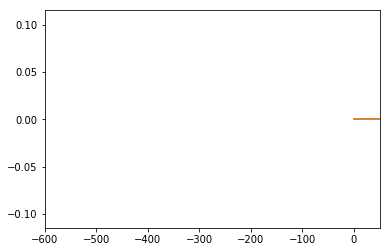

In [81]:
plot(time, Dx)
plot(time, Dy)
xlim(-600,50)

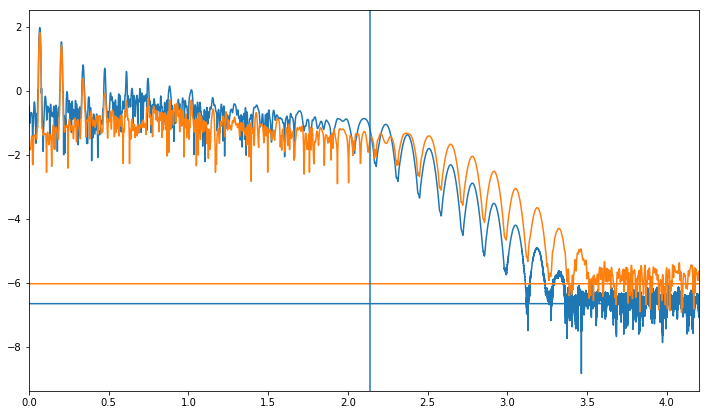

In [83]:
figure(figsize=(12,7))
frex = fft.fft(2 * Dy)
frey = fft.fft(2 * D_real)
w = 2* pi* fft.fftfreq(len(time), dt)
plot(w, log10(abs(frex)))
plot(w, log10(abs(frey)))
xlim(0,4.2)
axvline(Up0)

In [68]:
mul=16*Dx.size
Dx_ext = np.pad(Dx, (mul, mul), 'constant')
Dy_ext = np.pad(Dy, (mul, mul), 'constant')
time_ext = np.pad(time,(mul,mul), 'constant')
Dx_thz = zeros(Dx.size, complex)
Dy_thz = zeros(Dy.size, complex)
con_1=int(0.0151992/(2*pi*(1/(len(time)*dt)))+1)
con_2=int(0.0151992/(2*pi*(1/(len(time)*dt))))
print(con_1,frex)
Dx_thz[0:con_1]=frex[0:con_1]
Dy_thz[0:con_1]=frey[0:con_1]
Dx_thz[(frex.size-con_2):frex.size]=frex[(frex.size-con_2):Dx.size]
Dy_thz[(frex.size-con_2):frex.size]=frey[(frex.size-con_2):Dx.size]
sx=ifft(Dx_thz)
sy=ifft(Dy_thz)

41 [ 0.33086387+0.j         -0.32906234+0.00454433j  0.32371927-0.00875603j
 ... -0.314963  -0.01231472j  0.32371927+0.00875603j
 -0.32906234-0.00454433j]


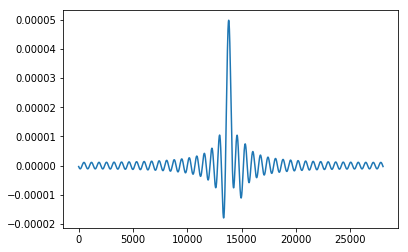

In [69]:
plot(sy)

In [70]:
Dx_1=zeros(Dx.size)
Dy_1=zeros(Dy.size)
Dx_1[Dx.size-1]=((Dx[Dx.size-1]-Dx[Dx.size-2])/dt)
Dy_1[Dy.size-1]=((Dy[Dy.size-1]-Dy[Dy.size-2])/dt)
for m in range(Dx.size-1):
    Dx_1[m]=((Dx[m+1]-Dx[m])/dt)
    Dy_1[m]=((Dy[m+1]-Dy[m])/dt)
#
Dx_2=zeros(Dx.size)
Dy_2=zeros(Dy.size)
Dx_2[Dx.size-1]=((Dx_1[Dx.size-1]-Dx_1[Dx.size-2])/dt)
Dy_2[Dy.size-1]=((Dy_1[Dy.size-1]-Dy_1[Dy.size-2])/dt)
for n in range(Dx.size-1):
    Dx_2[n]=((Dx_1[n+1]-Dx_1[n])/dt)
    Dy_2[n]=((Dy_1[n+1]-Dy_1[n])/dt)

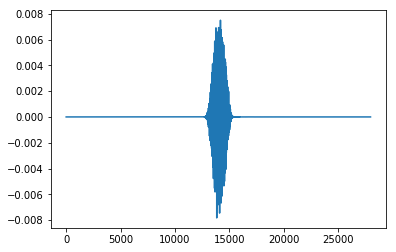

In [71]:
plot(Dx_2)

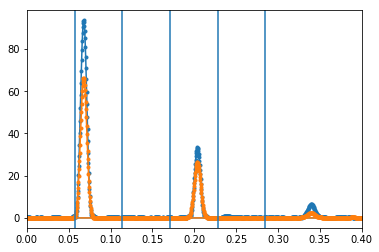

In [72]:
plot(w, (abs(frex)), '.-')
plot(w, (abs(frey)), '.-')
xlim(0,0.4)
axvline(0.057)
axvline(0.114)
axvline(0.171)
axvline(0.228)
axvline(0.285)

(77.5, 86)

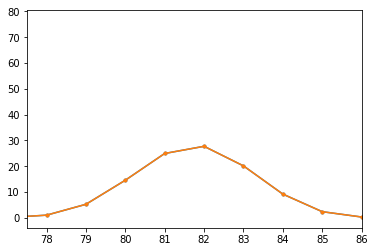

In [53]:
plot(abs(frex), '.-')
plot(abs(frey), '.-')
xlim(77.5,86)
#xlim(0,100)

$A= A_0sin^2(w\frac{t}{2nc})cos(wt)$